In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

df = pd.read_csv('yah.csv')

# Line 9 to 17 is for preprocessing and saving the dataset downloaded from yahoo website
# It is not necessary to run these codes if you are using provided dataset in repo.
# If you want to use your own dataset downloaded from yahoo then first run these with commented rest.
# After that you can run as usual provided.

# df = df.drop(['Date'],axis=1)
# for col in df:
#     for i,item in enumerate(df[col]):
#         if item=='null':
#             df[col][i] = np.nan
# df = df.dropna(inplace=False)
# for col in df:
#     print(df[col].isnull().sum())
# df.to_csv('yah.csv',index=False)

df = df.drop(['Adj Close','Volume'],axis=1)

In [2]:
df_train = df[:1059]
df_test = df[1059:]
scaler = MinMaxScaler()

X_train = scaler.fit_transform(df_train.drop(['Close'],axis=1).as_matrix())
y_train = scaler.fit_transform(df_train['Close'].as_matrix().reshape(-1, 1))
#y_train = df_train['Close'].as_matrix()

X_test = scaler.fit_transform(df_test.drop(['Close'],axis=1).as_matrix())
y_test = scaler.fit_transform(df_test['Close'].as_matrix().reshape(-1, 1))
#y_test = df_test['Close'].as_matrix()
print(X_train.shape)
print(np.max(y_test),np.max(y_train),np.min(y_test),np.min(y_train))

(1059, 3)
1.0 1.0 0.0 0.0


d:\softwarewebapps\python\tf-gpu\tfgpu\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
d:\softwarewebapps\python\tf-gpu\tfgpu\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
d:\softwarewebapps\python\tf-gpu\tfgpu\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
d:\softwarewebapps\python\tf-gpu\tfgpu\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [3]:
X_test,y_test

(array([[0.30658414, 0.26791127, 0.23517606],
        [0.2209979 , 0.19259508, 0.19896753],
        [0.1763382 , 0.12916908, 0.12641754],
        [0.15980263, 0.17882579, 0.16662945],
        [0.30879741, 0.27617216, 0.28125926],
        [0.27637728, 0.24666653, 0.27543229],
        [0.31287727, 0.28937371, 0.32307235],
        [0.33158289, 0.29811611, 0.31817933],
        [0.33822356, 0.30301152, 0.31617764],
        [0.34547118, 0.32941376, 0.36506355],
        [0.34048007, 0.33173084, 0.34544715],
        [0.36378686, 0.33382851, 0.35879176],
        [0.35402166, 0.31931645, 0.35051828],
        [0.3158721 , 0.26664344, 0.23072786],
        [0.25597886, 0.214189  , 0.13936163],
        [0.17902872, 0.13244748, 0.1279301 ],
        [0.12972546, 0.10512746, 0.10426515],
        [0.10416216, 0.06687942, 0.07246051],
        [0.08215824, 0.13546378, 0.09786043],
        [0.19934068, 0.21257114, 0.21649362],
        [0.29660193, 0.2635836 , 0.29371422],
        [0.30910173, 0.26087294, 0

In [4]:
def denormalize(df,norm_data):
    df = df['Close'].values.reshape(-1,1)
    norm_data = norm_data.reshape(-1,1)
    scl = MinMaxScaler()
    a = scl.fit_transform(df)
    new = scl.inverse_transform(norm_data)
    return new

def neural_net_model(X_data,input_dim):
    W_1 = tf.Variable(tf.random_uniform([input_dim,10]))
    b_1 = tf.Variable(tf.zeros([10]))
    layer_1 = tf.add(tf.matmul(X_data,W_1), b_1)
    layer_1 = tf.nn.tanh(layer_1)

    W_2 = tf.Variable(tf.random_uniform([10,10]))
    b_2 = tf.Variable(tf.zeros([10]))
    layer_2 = tf.add(tf.matmul(layer_1,W_2), b_2)
    layer_2 = tf.nn.tanh(layer_2)

    W_O = tf.Variable(tf.random_uniform([10,1]))
    b_O = tf.Variable(tf.zeros([1]))
    output = tf.add(tf.matmul(layer_2,W_O), b_O)

    return output,W_O

Epoch : 0 Cost : 1.067023
Epoch : 1 Cost : 0.028971113
Epoch : 2 Cost : 0.0037685
Epoch : 3 Cost : 0.0044668815
Epoch : 4 Cost : 0.0041701808
Epoch : 5 Cost : 0.0049610273
Epoch : 6 Cost : 0.0072659976
Epoch : 7 Cost : 0.0072144396
Epoch : 8 Cost : 0.009456558
Epoch : 9 Cost : 0.010518147
Epoch : 10 Cost : 0.011360862
Epoch : 11 Cost : 0.012409633
Epoch : 12 Cost : 0.0138861
Epoch : 13 Cost : 0.016243001
Epoch : 14 Cost : 0.020594876
Epoch : 15 Cost : 0.026610373
Epoch : 16 Cost : 0.025745906
Epoch : 17 Cost : 0.024169706
Epoch : 18 Cost : 0.023540828
Epoch : 19 Cost : 0.023059387
Epoch : 20 Cost : 0.022585396
Epoch : 21 Cost : 0.021912523
Epoch : 22 Cost : 0.021441022
Epoch : 23 Cost : 0.021058094
Epoch : 24 Cost : 0.020805191
Epoch : 25 Cost : 0.020654509
Epoch : 26 Cost : 0.020436857
Epoch : 27 Cost : 0.020177627
Epoch : 28 Cost : 0.01978561
Epoch : 29 Cost : 0.019442042
Epoch : 30 Cost : 0.019114276
Epoch : 31 Cost : 0.018610137
Epoch : 32 Cost : 0.017981365
Epoch : 33 Cost : 0.017

Save model ? [Y/N]n


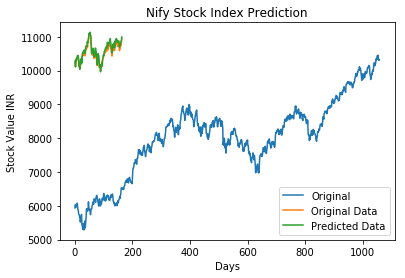

In [6]:
xs = tf.placeholder("float")
ys = tf.placeholder("float")

output,W_O = neural_net_model(xs,3)

cost = tf.reduce_mean(tf.square(output-ys))
train = tf.train.AdamOptimizer(0.001).minimize(cost)

correct_pred = tf.argmax(output, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

c_t = []
c_test = []


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    saver = tf.train.Saver()
    y_t = denormalize(df_train,y_train)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.xlabel('Days')
    plt.ylabel('Stock Value INR')
    plt.title('Nify Stock Index Prediction')
    ax.plot(range(len(y_train)), y_t,label='Original')
    plt.ion()

    #saver.restore(sess,'yahoo_dataset.ckpt')
    for i in range(100):
        #sess.run([cost,train],feed_dict={xs:X_train, ys:y_train})
        for j in range(X_train.shape[0]):
            sess.run([cost,train],feed_dict={xs:X_train[j,:].reshape(1,3), ys:y_train[j]})

        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        pred = sess.run(output, feed_dict={xs:X_train})
        pred = denormalize(df_train,pred)
#         lines = ax.plot(range(len(y_train)), pred,'r-',label='Prediction')
#         plt.legend(loc='best')
#         plt.pause(0.1)

        c_t.append(sess.run(cost, feed_dict={xs:X_train,ys:y_train}))
        c_test.append(sess.run(cost, feed_dict={xs:X_test,ys:y_test}))
        print('Epoch :',i,'Cost :',c_t[i])

    pred = sess.run(output, feed_dict={xs:X_test})
    for i in range(y_test.shape[0]):
        print('Original :',y_test[i],'Predicted :',pred[i])

    #plt.plot(range(50),c_t)
    #plt.plot(range(50),c_test)
    #plt.show()

    print('Cost :',sess.run(cost, feed_dict={xs:X_test,ys:y_test}))
    y_test = denormalize(df_test,y_test)
    pred = denormalize(df_test,pred)
    plt.plot(range(y_test.shape[0]),y_test,label="Original Data")
    plt.plot(range(y_test.shape[0]),pred,label="Predicted Data")
    plt.legend(loc='best')
    """plt.ylabel('Stock Value')
    plt.xlabel('Days')
    plt.title('Stock Market Nifty')"""
    #plt.show()
    if input('Save model ? [Y/N]') == 'Y':
        import os
        saver.save(sess, os.getcwd() + '/yahoo_dataset.ckpt')
        print('Model Saved')